In [6]:
import concurrent.futures
from time import perf_counter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import gridspec, pyplot as plt
from matplotlib.widgets import Slider, CheckButtons
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

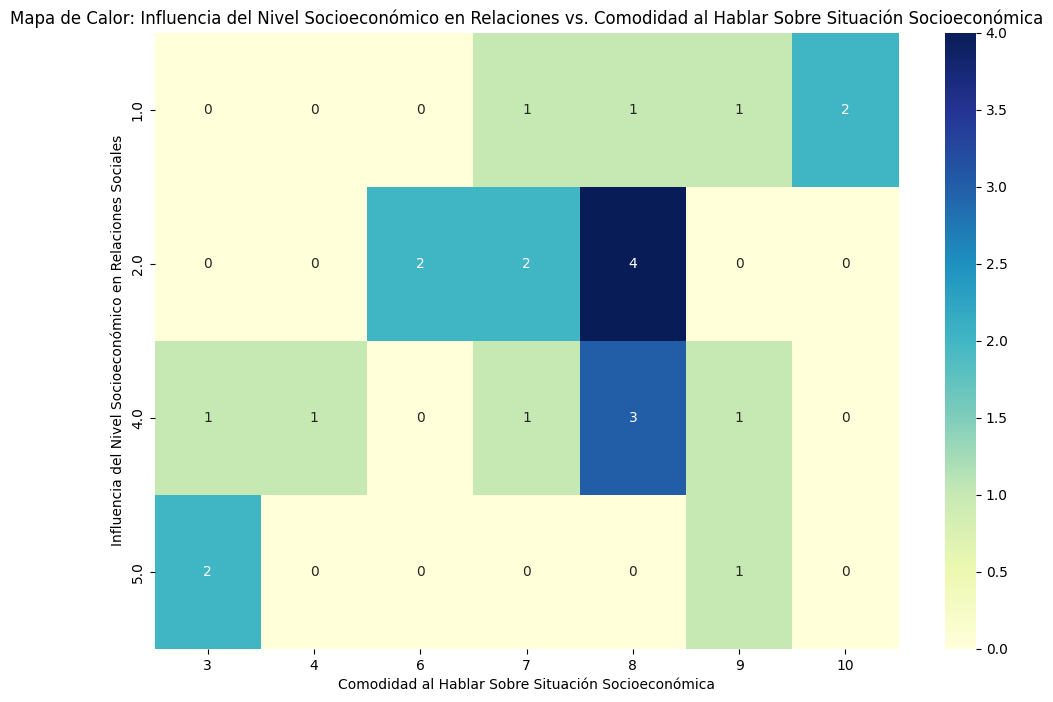

In [13]:

file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

# Mapeo de las respuestas a valores numéricos para el mapa de calor
response_mapping = {
    "Definitivamente no": 1,
    "Probablemente no": 2,
    "Neutral": 3,
    "Probablemente sí": 4,
    "Definitivamente sí": 5
}

data["Influencia en relaciones sociales"] = data["¿Consideras que tu nivel socioeconómico ha afectado la formación de tus relaciones sociales en el campus?"].map(response_mapping)



data.rename(columns={"Escala del 1 al 10 (1 = No me siento parte del campus, 10 = Me siento completamente integrado/a)\n¿Qué tan cómodo te sientes hablando sobre tu situación socioeconómica con otras personas en tu entorno?": "Comodidad al hablar sobre situación socioeconómica"}, inplace=True)

heatmap_data = data.pivot_table(index="Influencia en relaciones sociales", columns="Comodidad al hablar sobre situación socioeconómica", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Mapa de Calor: Influencia del Nivel Socioeconómico en Relaciones vs. Comodidad al Hablar Sobre Situación Socioeconómica")
plt.xlabel("Comodidad al Hablar Sobre Situación Socioeconómica")
plt.ylabel("Influencia del Nivel Socioeconómico en Relaciones Sociales")

# Guardar la gráfica como "mapa_de_calor.png" con ajustes para evitar imagen en blanco
plt.savefig("mapa_de_calor.png", bbox_inches="tight", pad_inches=0.1)

# Mostrar la gráfica en pantalla (opcional)
plt.show()


In [3]:

file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

x_column = 'Escala del 1 al 10 (1 = No me siento parte del campus, 10 = Me siento completamente integrado/a)\n¿Qué tan cómodo te sientes hablando sobre tu situación socioeconómica con otras personas en tu entorno?'
y_column = '¿Cómo calificarías el ambiente social en el Tecnológico de Monterrey campus en términos de inclusión?'
color_column = '¿Crees que la discriminación socioeconómica ha influido en la creación de grupos en el campus?'

fig = px.scatter(data, x=x_column, y=y_column, color=color_column)
fig.show()

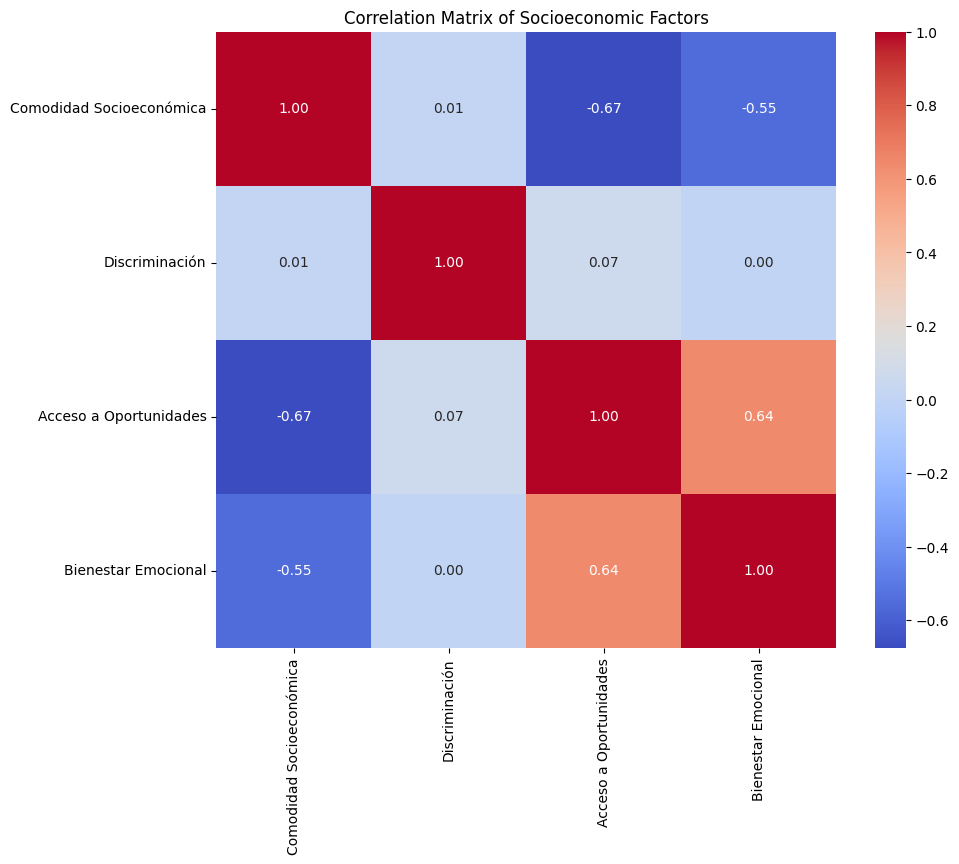

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

data_renamed = data.rename(columns={
    "Escala del 1 al 10¿Qué tan cómodo te sientes hablando sobre tu situación socioeconómica con otras personas en tu entorno?": "Comodidad Socioeconómica",
    "Haz experimentado discriminación": "Discriminación",
    "¿Sientes que tu nivel socioeconómico afecta tu acceso a oportunidades como becas, intercambios, o prácticas profesionales?": "Acceso a Oportunidades",
    "¿tu nivel socioeconómico afecta tu bienestar emocional o salud mental?": "Bienestar Emocional"
})

correlation_data = data_renamed[[
    "Comodidad Socioeconómica",
    "Discriminación",
    "Acceso a Oportunidades",
    "Bienestar Emocional"
]]


correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Socioeconomic Factors")

plt.savefig("mapa_de_calor_correlacion2.png", bbox_inches="tight", pad_inches=0.1)

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ruta del archivo Excel (ajusta según sea necesario)
file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="¿tu nivel socioeconómico afecta tu bienestar emocional o salud mental?")
plt.title("Distribución del Bienestar Emocional")
plt.savefig("histograma_bienestar_emocional.png")
plt.close()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ruta del archivo Excel (ajusta según sea necesario)
file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

# Seleccionando solo las columnas numéricas para PCA
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numerical = data[numerical_columns]

# Estandarizando los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical.dropna())

# Aplicando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Filtrando los valores menores a 0 en ambos componentes
principal_df_filtered = principal_df[(principal_df['PC1'] >= 0) & (principal_df['PC2'] >= 0)]

# Visualización de los Componentes Principales con el filtro aplicado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df_filtered)
plt.title("PCA de Factores Socioeconómicos (Filtrado)")
plt.savefig("pca_factores_socioeconomicos_filtrado.png")
plt.close()
